In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
# 加载糖尿病患者的数据
# 根据葡萄糖含量和血压判断是否会得糖尿病
data = pd.read_csv('./Naive-Bayes-Classification-Data.csv')

data.head()

glucose  bloodpressure  diabetes
0       40             85         0
1       40             92         0
2       45             63         1
3       45             80         0
4       40             73         1

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  if __name__ == '__main__':


Text(0, 0.5, 'bloodpressure')

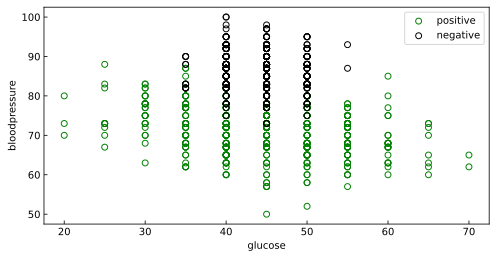

In [3]:
# 显示患者分布

data_positive = data[data['diabetes'].isin([1])]
data_negative = data[data['diabetes'].isin([0])]

plt.figure(figsize = (8,4))
plt.tick_params(direction = 'in')
plt.scatter(data_positive['glucose'],data_positive['bloodpressure'],c='',edgecolors='g',label='positive')
plt.scatter(data_negative['glucose'],data_negative['bloodpressure'],c='',edgecolors='black',label='negative')
plt.legend()
plt.xlabel('glucose')
plt.ylabel('bloodpressure')

In [4]:
# 数据预处理 

X,y=data.drop('diabetes',axis=1),data['diabetes']

# 划分数据集
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=42)

In [5]:
# 定义模型
# 高斯贝叶斯

model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [6]:
# 预测

y_pred = model.predict(X_test)
acc = accuracy_score(y_test,y_pred)*100
print(f'acc: {acc}')

acc: 92.7710843373494
